**2.2_gmm-select**

This notebook finds the optimal number of GMM/HMM states using BIC

In [25]:
import sklearn as sk
from sklearn.model_selection import GridSearchCV
from sklearn.mixture import GaussianMixture
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
import os

In [26]:
dir = '/Users/fionshiau/Documents/2023Spring/Computational_Genomics/Final_Project/comp-geno-proj/'

In [27]:
dat = pd.read_csv(os.path.join(dir,'data','merged','1.4.0_train.csv'))

In [28]:
dat.iloc[0:5,:]

,Unnamed: 0,chr,start,end,HiC_AB,H3K4me2,H3K9Ac,H3K4me3,ATAC-seq,H3K4me1,H3K27Ac,H3K27me3,RNAPol
0,chr1_0-5000,chr1,0,5000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
1,chr1_5000-10000,chr1,5000,10000,-0.014358,0.000000,0.000000,0.000000,0.474979,0.0,0.873456,0.000000,0.106125
2,chr1_10000-15000,chr1,10000,15000,-0.004929,0.204483,0.000000,0.043258,0.336872,0.0,0.219781,0.659145,0.600027
3,chr1_15000-20000,chr1,15000,20000,-0.004310,0.232708,0.314744,0.045658,0.023892,0.0,0.000000,0.000000,0.918754
4,chr1_20000-25000,chr1,20000,25000,-0.194548,0.000000,0.000000,0.000000,0.980893,0.0,0.000000,0.000000,0.000000


In [29]:
mat = dat.iloc[:,4:].to_numpy()

In [18]:
# normalize non-HiC column to range from 0 to 1 by min-max scaler
#mat[:,1:] = (mat[:,1:]/mat[:,1:].sum(axis=0))*1e6
#from sklearn.preprocessing import Normalizer
#mat = np.hstack((mat[:,0].reshape(-1,1),Normalizer().fit_transform(X=mat[:,1:])))
#mat = Normalizer().fit_transform(mat)

In [30]:
# find optimal n_components for GMM
from joblib import Parallel, delayed, parallel_backend
def gmm_bic(X, n):
    gm = GaussianMixture(n_components = n, random_state=0).fit(X)
    return gm.bic(X)

output = Parallel(n_jobs=6)(delayed(gmm_bic)(mat, n=i) for i in range(1,15))

In [31]:
output

[-4684175.914622771,
 -8893740.629365124,
 -13574174.60522929,
 -14810568.53277108,
 -15575576.159721365,
 -15860092.224688051,
 -16247136.426382963,
 -16415445.337255983,
 -16607298.746397309,
 -16992401.587225493,
 -17094602.997126043,
 -17282628.75266843,
 -17470692.462285317,
 -17672318.935245275]

In [32]:
grad = np.gradient(output)

In [33]:
grad

array([-4209564.71474235, -4444999.34530326, -2958413.95170298,
       -1000700.77724604,  -524761.84595849,  -335780.1333308 ,
        -277676.55628397,  -180081.16000717,  -288478.12498476,
        -243652.12536437,  -145113.58272147,  -188044.73257964,
        -194845.09128842,  -201626.47295996])

[Text(0.5, 0, '# of components')]

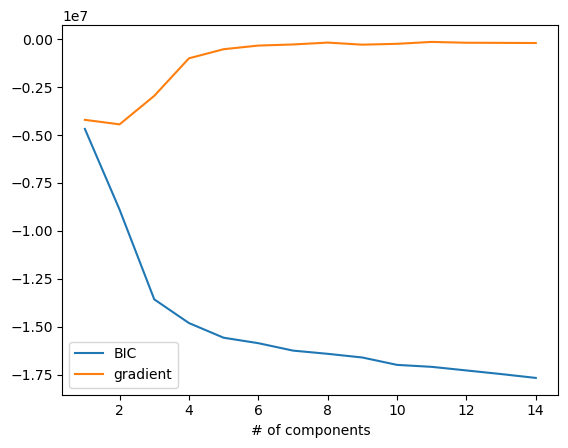

In [38]:
import seaborn as sns
sns.lineplot(x = range(1,len(grad)+1),y=output, label = 'BIC')
sns.lineplot(x = range(1,len(grad)+1),y=grad, label = 'gradient').set(xlabel='# of components')